In [5]:
pip install comut

     |████████████████████████████████| 111 kB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
## import requirements
from comut import comut
from comut import fileparsers
import pandas as pd
import numpy as np
import palettable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator # this function sets the location of the minor tick mark
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date

In [29]:
# set sample order based on therapy
sample_order = list(therapy_df['sample'])

## add mapping and kwargs for colors, range for the value data range
## color mapping for categorical and continuous data

rna_seq_mapping = {'X': 'darkgreen', 'Not applicable': 'whitesmoke'}
wgs_type__mapping = {'standard':'#D35FB7', 'linked-read':'#A3B7F9'}
normal_control_mapping = {'Blood':'red', 'Adj Normal':'green', 'Adj Kidney':'blue'}
bio_process_mapping = {'biopsy':'yellow', 'resection':'aquamarine', 'none':'whitesmoke'}
tumor_site_mapping = {'Primary R Kidney':'#CDB1AD', 'LUL Met':'#FADFE2', 'Primary L Kidney':'#DECBE3', 'Primary Kidney':'darkviolet', 'L Kidney':'#BDB8AD', 'R Kidney': '#C6D4E1', 'LN Met':'#44749D', 'LPA Node':'#5D6E9E', 'Psoas Muscle Met':'#FFD700'}
therapy_mapping = {'N':'whitesmoke','Pazopanib':'#EE442F','Temsirolimus':'#F9F4EC', 'Pre-Len/Evero':'#332288'}
sample_type_mapping = {'Frozen':'#2A385B', 'FFPE':'#8B7F47'}
gender_mapping = {'Male':'#FFC107', 'Female':'#40B0A6'}

class_freq_mapping = {'Frame shift': '#D55E00', 'Missense': '#009E73', 'UTR3':'#332288', 'UTR5': '#0072B2', 'Splice site': '#F0E442', 'Promoter': '#d62728', 'High':'cyan', 'Moderate':'#7f7f7f', 'Low':'#17becf', 'Modifiers':'#bcbd22'}
tmb_bar_mapping = {'INDEL':'#2A385B','SNV':'#8B7F47'}


In [30]:
## add comut and defining its order
wgs_comut = comut.CoMut()
wgs_comut.samples = sample_order

# adding categorical data in order of gender, therapy, tumor site, bio process, normal control, wgs type and rna seq type
# for now we don't have a continuous data to add?
wgs_comut.add_categorical_data(rna_seq_df, name = 'RNA seq', mapping = rna_seq_mapping)
wgs_comut.add_categorical_data(wgs_type_df, name = 'WGS type', mapping = wgs_type__mapping)
wgs_comut.add_categorical_data(normal_control_df, name = 'Normal Control', mapping = normal_control_mapping)
wgs_comut.add_categorical_data(bio_process_df, name = 'Biological process', mapping = bio_process_mapping)
wgs_comut.add_categorical_data(tumor_site_df, name = 'Tumor site', mapping = tumor_site_mapping)
wgs_comut.add_categorical_data(therapy_df, name = 'Therapy', mapping = therapy_mapping)
wgs_comut.add_categorical_data(sample_type_df, name = 'Sample', mapping = sample_type_mapping)
wgs_comut.add_categorical_data(gender_df, name = 'Gender', mapping = gender_mapping)

# define mapping
#bar_kwargs = {'width': 0.8, 'edgecolor': 'black'}
bar_mapping = {'INDEL' : 'purple', 'SNV' : 'pink'}

#add bar data
wgs_comut.add_bar_data(class_freq_df, name = 'Class frequency', mapping = class_freq_mapping, stacked = True, bar_kwargs = {'width': 0.8, 'edgecolor': 'black'}, ylabel = 'Number of SVs')
wgs_comut.add_bar_data(tmb_df, name = 'Mutation type', mapping = tmb_bar_mapping, stacked = True, bar_kwargs = {'width': 0.8, 'edgecolor': 'black', 'log':'True'}, ylabel = 'Mutations per Mb')


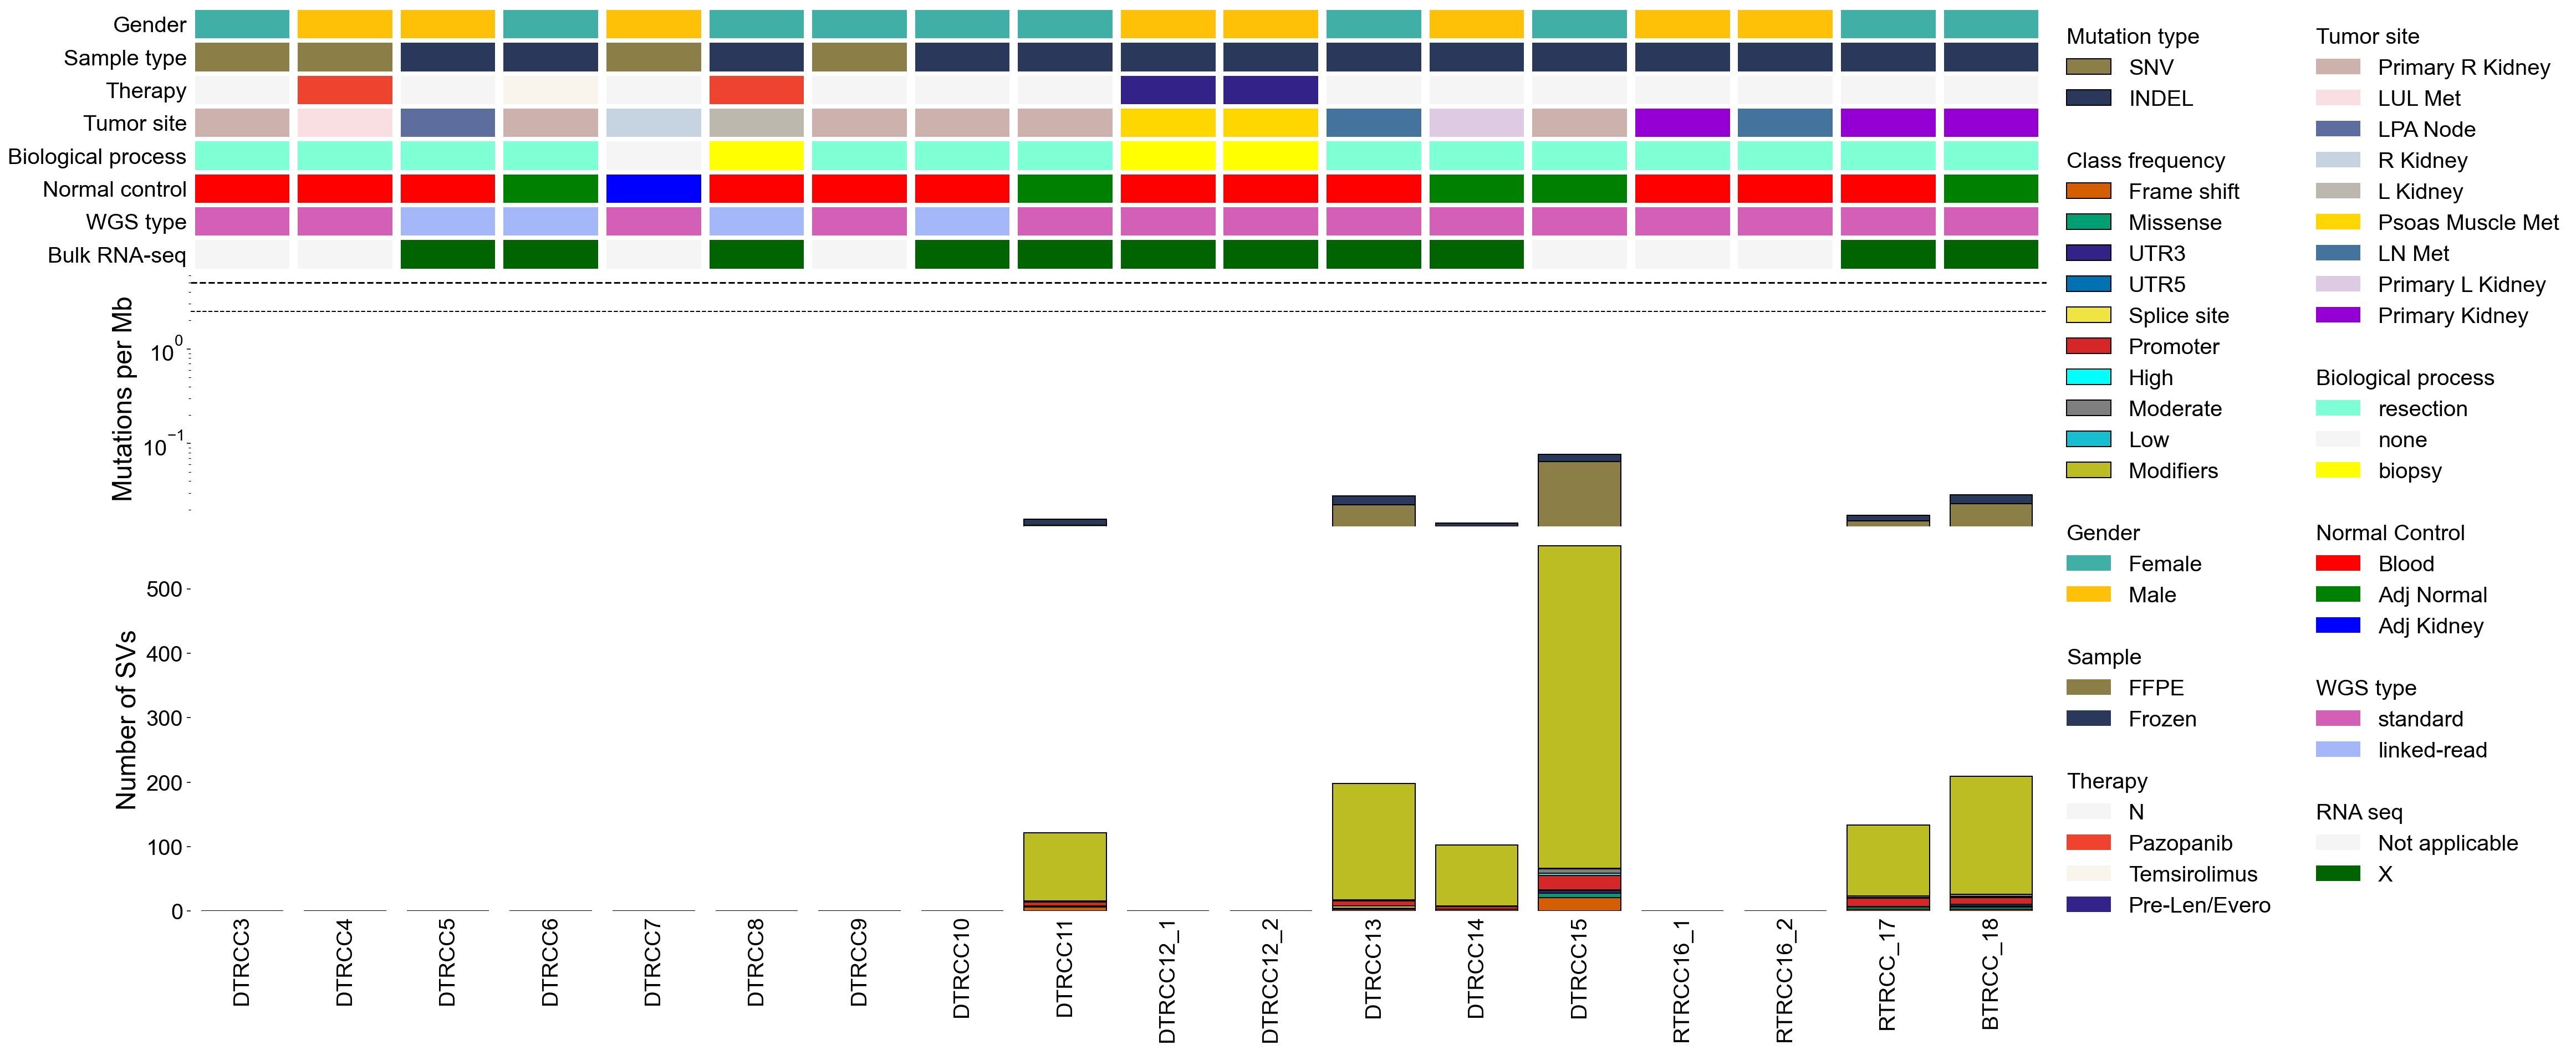

In [32]:
# global matplotlib params
# this can be used to change the shape of the patches in fig size. 
# Defaults to the matplotlib rcParams default, usually (6.4, 4.8) unless changed. 
# this will plot bar graph at the bottom

custom_rcParams = {
  'font.family': 'Arial',
  'font.size': 16, 
  'axes.titlesize' : 18, 
  'axes.labelsize': 24, #plot label size
  'legend.fontsize': 20, #legend size
  'xtick.labelsize': 20, #side bar plot x-axis ; patients
  'ytick.labelsize': 20 #y-axis
}

rcParams.update(custom_rcParams)

#Adjust height accordingly to mutation data, e.g. if mutation data has 11 genes, its relative height is 11

heights = {'Mutation type': 20, 'Class frequency': 30, 'Gender' : 2.5, 'Sample' : 2.5, 'Tumor site': 2.5, 'Therapy': 2.5,
           'Biological process' : 2.5, 'Normal Control' : 2.5, 'WGS type' : 2.5, 'RNA seq' : 2.5}

# decrease size of side bar--relative widths of the sideplots in the comut vs. the main figure
#	widths = [1, 5, 1, 5] #two side bar plot

# move side bar plot slightly closer to comut
wspace = 0.12 #0.18
border_white = ['Absent']

#define structure from bottom to top
structure = [['Class frequency'],
             ['Mutation type'],
             ['RNA seq'], 
             ['WGS type'],
             ['Normal Control'],
             ['Biological process'],
             ['Tumor site'],
             ['Therapy'],
             ['Sample'],          
             ['Gender']]

wgs_comut.plot_comut(figsize = (30, 15), heights = heights, wspace = wspace, x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, subplot_hspace = 0.05, hspace = 0.01, structure = structure)

#set threshold lines for TMB
wgs_comut.axes['Mutation type'].axhline(2.5, color = 'black', linestyle = '--', linewidth = 1)
wgs_comut.axes['Mutation type'].axhline(5, color = 'black', linestyle = '--', linewidth = 1.5)

#add legend
wgs_comut.add_unified_legend(border_white = border_white, ncol = 2)


plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')

## previous ones
#structure = [['Gender'], ['Sample'], ['Therapy'], ['Tumor site'], ['Biological process'], ['Normal Control'], ['WGS type'], ['RNA seq']]

#wgs_comut.plot_comut(figsize = (10,2), x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, structure = structure)
#wgs_comut.add_unified_legend()
#plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')


In [ ]:
# To plot bar graph on the top

sample_order = list(therapy_df['sample'])

## add mapping and kwargs for colors, range for the value data range
## color mapping for categorical and continuous data
rna_seq_mapping = {'X': 'darkgreen', 'Not applicable': 'whitesmoke'}
wgs_type__mapping = {'standard':'#D35FB7', 'linked-read':'#A3B7F9'}
normal_control_mapping = {'Blood':'red', 'Adj Normal':'green', 'Adj Kidney':'blue'}
bio_process_mapping = {'biopsy':'yellow', 'resection':'aquamarine', 'none':'whitesmoke'}
tumor_site_mapping = {'Primary R Kidney':'#CDB1AD', 'LUL Met':'#FADFE2', 'Primary L Kidney':'#DECBE3', 'Primary Kidney':'darkviolet', 'L Kidney':'#BDB8AD', 'R Kidney': '#C6D4E1', 'LN Met':'#44749D', 'LPA Node':'#5D6E9E', 'Psoas Muscle Met':'#FFD700'}
therapy_mapping = {'N':'whitesmoke','Pazopanib':'#EE442F','Temsirolimus':'#F9F4EC', 'Pre-Len/Evero':'#332288'}
sample_type_mapping = {'Frozen':'#2A385B', 'FFPE':'#8B7F47'}
gender_mapping = {'Male':'#FFC107', 'Female':'#40B0A6'}

class_freq_mapping = {'Frame shift': '#D55E00', 'Missense': '#009E73', 'UTR3':'#332288', 'UTR5': '#0072B2', 'Splice site': '#F0E442', 'Promoter': '#d62728', 'High':'cyan', 'Moderate':'#7f7f7f', 'Low':'#17becf', 'Modifiers':'#bcbd22'}
tmb_bar_mapping = {'INDEL':'#2A385B','SNV':'#8B7F47'}


In [ ]:

# global matplotlib params
# this can be used to change the shape of the patches in fig size. 
# Defaults to the matplotlib rcParams default, usually (6.4, 4.8) unless changed. 

custom_rcParams = {
  'font.family': 'Arial',
  'font.size': 16, 
  'axes.titlesize' : 18, 
  'axes.labelsize': 24, #plot label size
  'legend.fontsize': 20, #legend size
  'xtick.labelsize': 20, #side bar plot x-axis ; patients
  'ytick.labelsize': 20 #y-axis
}

rcParams.update(custom_rcParams)

#Adjust height accordingly to mutation data, e.g. if mutation data has 11 genes, its relative height is 11

heights = {'Mutation type': 20, 'Class frequency': 30, 'Gender' : 2.5, 'Sample' : 2.5, 'Tumor site': 2.5, 'Therapy': 2.5,
           'Biological process' : 2.5, 'Normal Control' : 2.5, 'WGS type' : 2.5, 'RNA seq' : 2.5}

# decrease size of side bar--relative widths of the sideplots in the comut vs. the main figure
#	widths = [1, 5, 1, 5] #two side bar plot

# move side bar plot slightly closer to comut
wspace = 0.12 #0.18
border_white = ['Absent']

#define structure from bottom to top
structure = [['Class frequency'],
             ['Mutation type'],
             ['RNA seq'], 
             ['WGS type'],
             ['Normal Control'],
             ['Biological process'],
             ['Tumor site'],
             ['Therapy'],
             ['Sample'],          
             ['Gender']]

wgs_comut.plot_comut(figsize = (30, 15), heights = heights, wspace = wspace, x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, subplot_hspace = 0.05, hspace = 0.01, structure = structure)

#set threshold lines for TMB
wgs_comut.axes['Mutation type'].axhline(2.5, color = 'black', linestyle = '--', linewidth = 1)
wgs_comut.axes['Mutation type'].axhline(5, color = 'black', linestyle = '--', linewidth = 1.5)

#add legend
wgs_comut.add_unified_legend(border_white = border_white, ncol = 2)


plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')

## previous ones
#structure = [['Gender'], ['Sample'], ['Therapy'], ['Tumor site'], ['Biological process'], ['Normal Control'], ['WGS type'], ['RNA seq']]

#wgs_comut.plot_comut(figsize = (10,2), x_padding = 0.04, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, structure = structure)
#wgs_comut.add_unified_legend()
#plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('/Users/machom/Documents/DFCI/srinivas_lab/WGS_data/comut_wgs_fig/tRCC_comut_all.pdf', format='pdf', bbox_inches='tight')
